Random forests are robust to overfitting, can handle thousands of input variables without variable decision, and run efficiently on large datasets. A random forest seems like it could work well as our predictor for san francisco crime data. 

In [1]:
#imports 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from path import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [2]:
#load data
file_path = Path("../Resources/cleaned_df.csv")
cleaned_df = pd.read_csv(file_path)
cleaned_df = cleaned_df.drop(columns=['Unnamed: 0'])
cleaned_df.head()

,Category,PdDistrict,Resolution
0,WEAPON LAWS,SOUTHERN,"ARREST, BOOKED"
1,WEAPON LAWS,SOUTHERN,"ARREST, BOOKED"
2,WARRANTS,BAYVIEW,"ARREST, BOOKED"
3,NON-CRIMINAL,TENDERLOIN,NONE
4,NON-CRIMINAL,MISSION,NONE


In [4]:
#create features
X = cleaned_df.drop("Resolution", axis=1)

#create target
y = cleaned_df["Resolution"]

In [5]:
#get dummy values for X
X = pd.get_dummies(X)
X.head()

,Category_ARSON,Category_ASSAULT,Category_BAD CHECKS,Category_BRIBERY,Category_BURGLARY,Category_DISORDERLY CONDUCT,Category_DRIVING UNDER THE INFLUENCE,Category_DRUG/NARCOTIC,Category_DRUNKENNESS,Category_EMBEZZLEMENT,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [9]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 81.93%


In [10]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,8036,1765
Actual 1,4895,22103


In [11]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                      pre       rec       spe        f1       geo       iba       sup

ARREST, BOOKED       0.62      0.82      0.82      0.71      0.82      0.67      9801
          NONE       0.93      0.82      0.82      0.87      0.82      0.67     26998

   avg / total       0.84      0.82      0.82      0.83      0.82      0.67     36799



In [12]:
# List the features sorted in descending order by feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
features = X.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. Category_ARSON (0.253924)
2. Category_ASSAULT (0.133640)
3. Category_BAD CHECKS (0.114087)
4. Category_BRIBERY (0.086009)
5. Category_BURGLARY (0.077802)
6. Category_DISORDERLY CONDUCT (0.038946)
7. Category_DRIVING UNDER THE INFLUENCE (0.037422)
8. Category_DRUG/NARCOTIC (0.032573)
9. Category_DRUNKENNESS (0.031456)
10. Category_EMBEZZLEMENT (0.026406)
11. Category_EXTORTION (0.018253)
12. Category_FAMILY OFFENSES (0.018248)
13. Category_FORGERY/COUNTERFEITING (0.013475)
14. Category_FRAUD (0.012568)
15. Category_GAMBLING (0.011400)
16. Category_KIDNAPPING (0.010888)
17. Category_LARCENY/THEFT (0.008860)
18. Category_LIQUOR LAWS (0.008060)
19. Category_LOITERING (0.007250)
20. Category_MISSING PERSON (0.006429)
21. Category_NON-CRIMINAL (0.004959)
22. Category_OTHER OFFENSES (0.004822)
23. Category_PORNOGRAPHY/OBSCENE MAT (0.004279)
24. Category_PROSTITUTION (0.003443)
25. Category_RECOVERED VEHICLE (0.003232)
26. Category_ROBBERY (0.003149)
27. Category_RUNAWAY (0

this feature ranking is based on tree entropy 

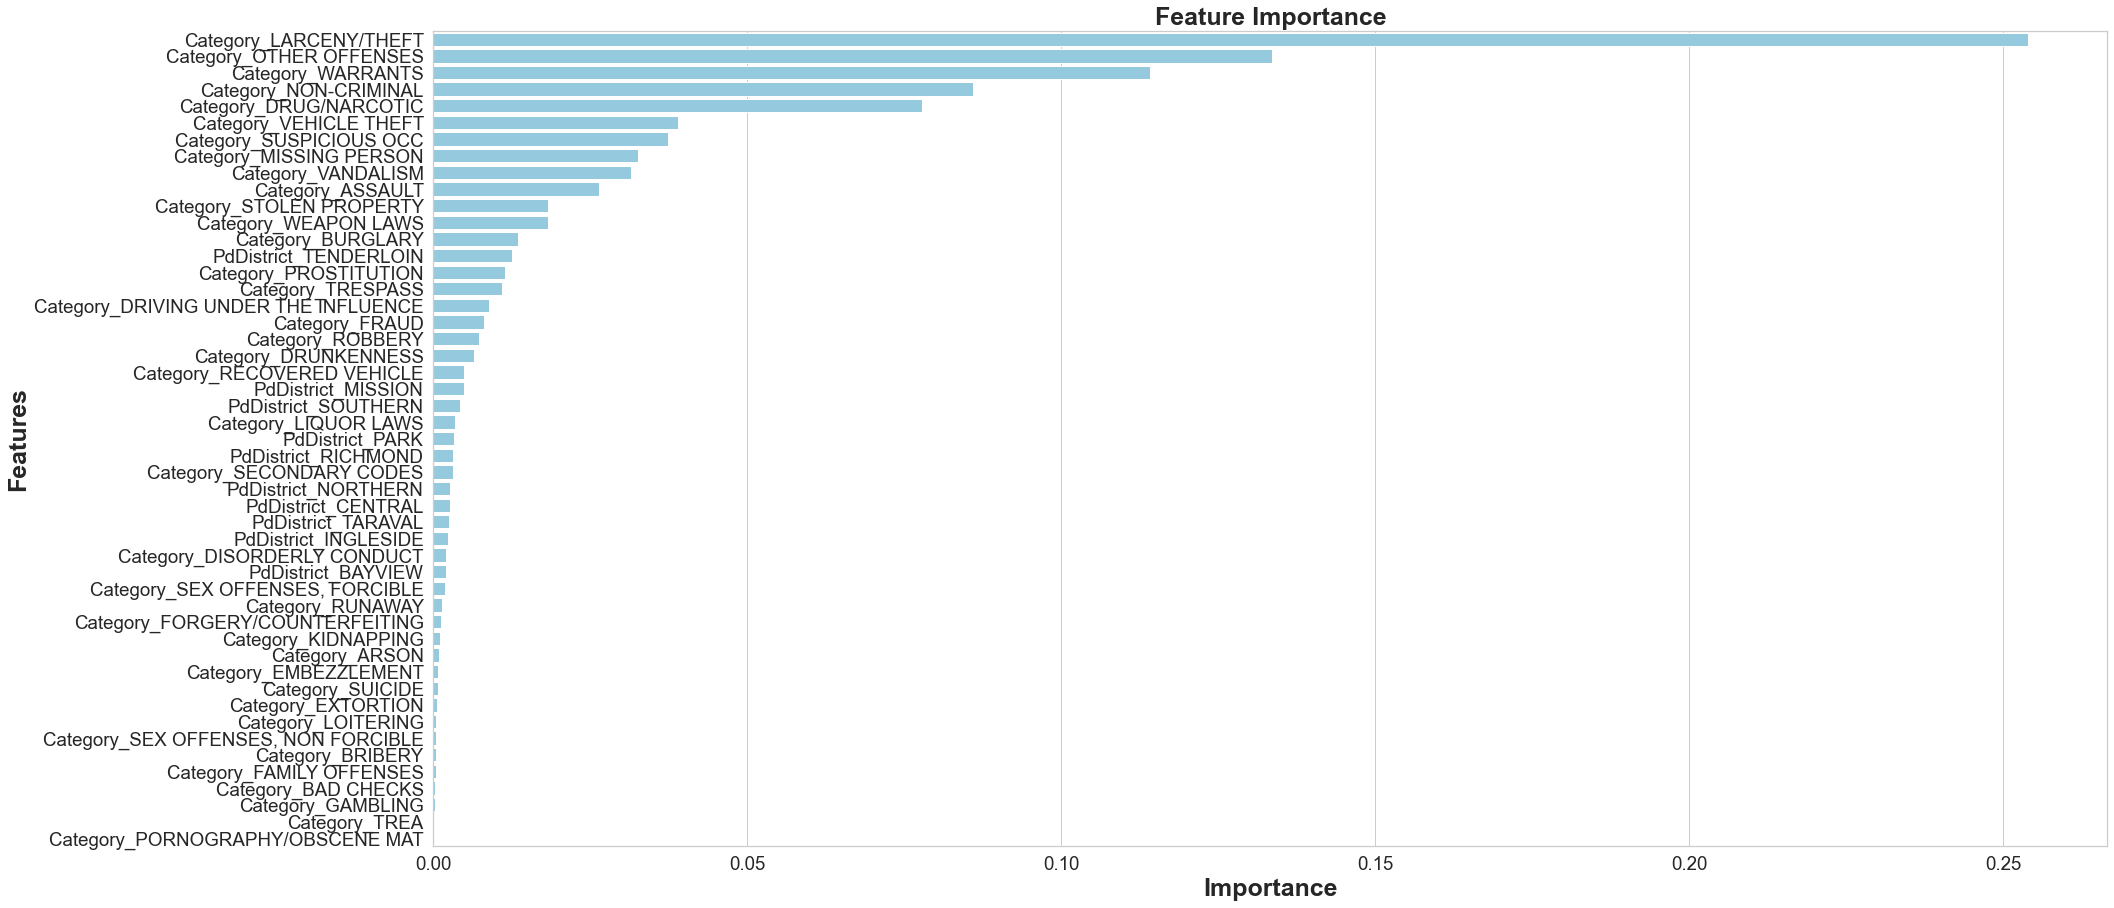

None

,Features,Gini-Importance
0,Category_LARCENY/THEFT,0.253924
1,Category_OTHER OFFENSES,0.133640
2,Category_WARRANTS,0.114087
3,Category_NON-CRIMINAL,0.086009
4,Category_DRUG/NARCOTIC,0.077802
5,Category_VEHICLE THEFT,0.038946
6,Category_SUSPICIOUS OCC,0.037422
7,Category_MISSING PERSON,0.032573
8,Category_VANDALISM,0.031456
9,Category_ASSAULT,0.026406


In [13]:
#https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a
feats = {}
for feature, importance in zip(X.columns, brf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)


This is our baseline random forest model. It uses all of the predicting features and default settings defined in the scikit-learn random forest classifier documentation. We can see what features are most important to the model to predict whether or not a crime will result in an arrest. 

In [14]:
#import our pca_df to train another baseline model to see if any improvements are made on predictions
file_path = Path("../Resources/pca_df.csv")
pca_df = pd.read_csv(file_path)
pca_df.head()


,pc1,pc2,pc3,pc4,pc5,target
0,1.606412,2.586252,-2.970303,0.810618,-0.824508,0
1,1.606412,2.586252,-2.970303,0.810618,-0.824508,0
2,5.496958,-4.444409,-1.828641,-1.238858,-0.521161,0
3,1.580430,4.645479,2.002497,-0.177009,0.120738,1
4,1.543681,-1.421526,-2.945142,1.743813,0.191303,1


In [16]:
#create features
X = pca_df.drop("target", axis=1)

#create target
y = pca_df["target"]

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# train the classifier
brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [19]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 99.48%


In [20]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,9767,34
Actual 1,189,26809


In [21]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      1.00      0.99      0.99      0.99      0.99      9801
          1       1.00      0.99      1.00      1.00      0.99      0.99     26998

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     36799

